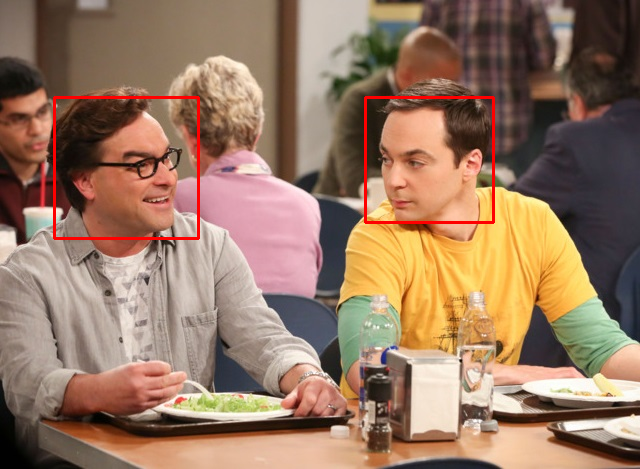

In [1]:
import cv2
import numpy as np
from detector import run as detect
from PIL import Image
from IPython.display import display

im = cv2.imread('./samples/bbt2.jpg')[:480,:640,::-1]
boxes = detect(im)
teaser = im.copy()
for b in boxes:
    b = (b[:4]).astype(np.int32)
    cv2.rectangle(teaser, b[:2], b[2:], (255,0,0), 2)

display(Image.fromarray(teaser))

unable to load materials from: template.mtl
specified material (None.001)  not loaded!


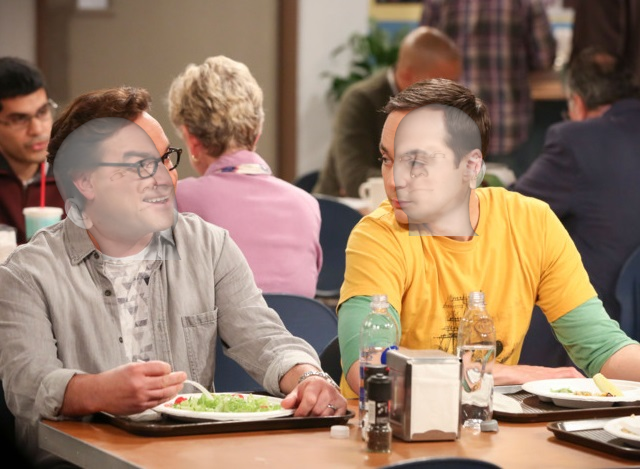

In [2]:
import math
from hpe import run as hpe
from renderer import Renderer
from scipy.spatial.transform import Rotation as R

render = Renderer((256, 256))

y, rois = hpe(im, boxes)
# teaser = im.copy()
teaser = Image.fromarray(im)
rendered = []
for i in range(len(y)):
    a = y[i]
    b = rois[i]
    s = 2.0 * a[2] / (b[2] - b[0])
    m = R.from_euler('xyz', a[3:6], degrees=False).as_matrix() * s
    rendered = cv2.resize(render(m), (int(b[2] - b[0]), int(b[3] - b[1])))
    rendered[:,:,3] = (rendered[:,:,3] * 0.5).astype(np.uint8)
    rendered = Image.fromarray(rendered)
    teaser.paste(rendered, (int(b[0] + (b[2] + b[0]) * 0.5 - a[0]), int(b[1] + (b[3] + b[1]) * 0.5 - a[1])), rendered)

display(teaser)